## Import our libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## load our dataset:

In [5]:
df = pd.read_csv("teams.csv")

In [6]:
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [7]:
df.describe()

,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
count,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2144.000000,2014.000000,2014.000000
mean,1994.507463,35.724813,73.693097,24.778591,173.900233,69.271595,10.556437,10.248759,9.449901
std,15.384205,49.490270,127.907577,2.808559,5.357367,7.606507,33.028143,31.951920,28.232227
min,1964.000000,1.000000,1.000000,17.000000,151.000000,43.000000,0.000000,0.000000,0.000000
25%,1984.000000,6.000000,7.000000,23.275000,170.500000,64.500000,0.000000,0.000000,0.000000
50%,1996.000000,13.000000,19.000000,24.700000,174.400000,69.400000,0.000000,0.000000,0.300000
75%,2008.000000,44.000000,70.250000,26.100000,177.300000,73.400000,4.000000,4.000000,4.650000
max,2016.000000,270.000000,839.000000,66.000000,193.000000,148.000000,442.000000,442.000000,314.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


so let's select the features we want to work with

In [9]:
df = df[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

In [10]:
df

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


### EDA

Let's explore our data to see if there's a correlation

D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\programs\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

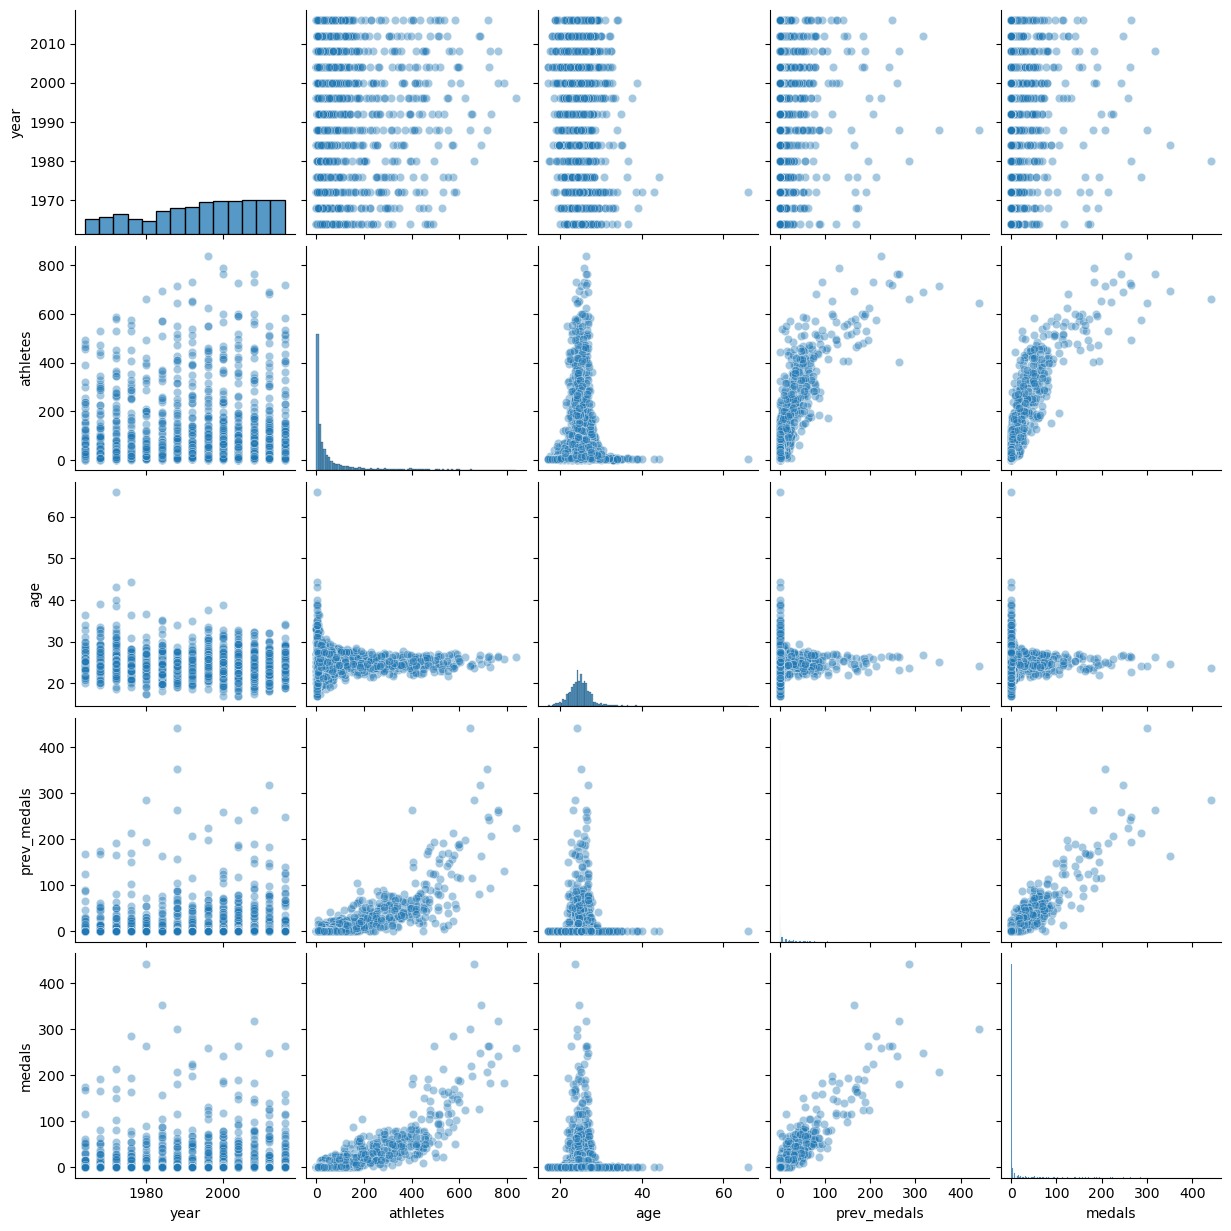

In [11]:
sns.pairplot(df, kind = 'scatter', plot_kws={'alpha': 0.4})

graphically, we can see that there's somewhat of a linear correlation between the number of athletes, with previous medal won by the country with medals. there's some sort of nonlinear relationship between the age of the athletes and the medals won 

In [12]:
df.select_dtypes(include=['number']).corr()["medals"]

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

This also shows us the correlation as well

looking at the correlation one after the other:

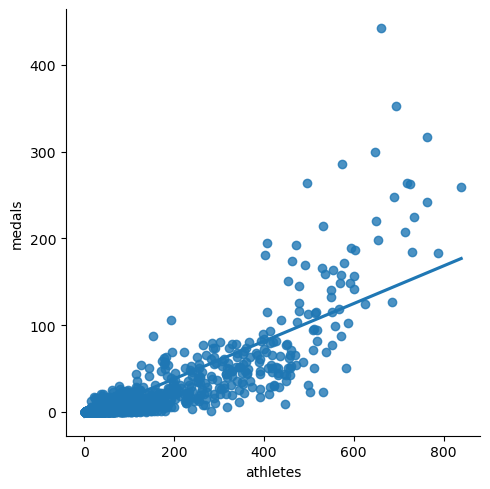

In [13]:
sns.lmplot(x = "athletes", y = "medals", data = df, fit_reg = True, ci = None)

There's a rough correlation here between the number of atheletes. Intuitively, this make sense because the more atheletes you have in a team, the more chances of winning more medals

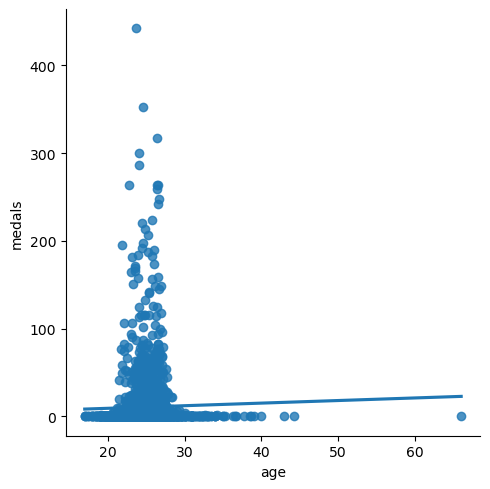

In [14]:
sns.lmplot(x = "age", y = "medals", data = df, fit_reg = True, ci = None)

There's a non-linear relationship between the age of the athletes and the number of medal. The plot shows that atheletes withing the ages of 20 and 30 are more likely to win a medal

<Axes: ylabel='Frequency'>

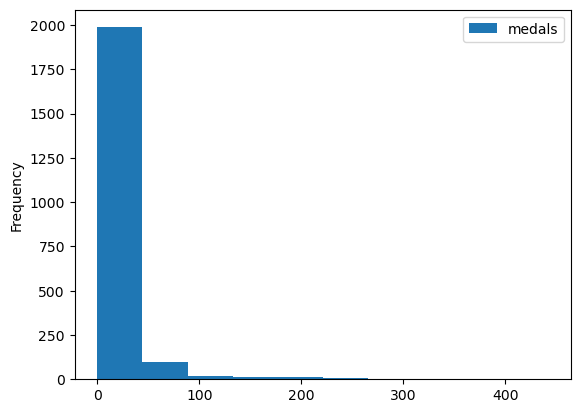

In [15]:
df.plot.hist(y = "medals")

From this histogram, we can see that a lot of countries have won between 0 - 50 medals, then fewer countries have won most of the medals. This imbalance might affect the accuracy and usefulness of our model. 

## Data Cleaning

let's look for rows that have missing values

In [16]:
df[df.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


we have about 130 rows that have missing values. This could be as a result of some team not participating in the previous olympics. So we are just going to drop those rows with missing values

In [17]:
df = df.dropna()

In [18]:
df

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


so we have 2014 rows now.

## Data Splitting

so since our data is a time series data, we want to split our data in a way that respect that. we will take the last two years, that is the 2012 and the 2016, and put them in our test set. We'll then take the previous years and put them in our training set. We are doing this because we are trying to respect the order, and not to use future data to predict the past.

In [19]:
train = df[df["year"] < 2012].copy()
test = df[df["year"] >= 2012].copy()

In [20]:
train.shape

(1609, 7)

In [21]:
test.shape

(405, 7)

## Training our model

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

so recall the features that linearly correlated with our targets: athletes and prev_medals. Those features will be our predictors.

In [23]:
predictors = ["athletes", "prev_medals"]
target = ["medals"]

In [24]:
lm.fit(train[predictors], train["medals"])

LinearRegression()